In [68]:
import pandas as pd

In [69]:
train = pd.read_csv("AAPL_train.csv")
train['Date'] = pd.to_datetime(train['Date'])
adj_df = train.set_index('Date')[['Adj Close']]
adj_df.head()

,Adj Close
Date,
2019-01-02,37.845032
2019-01-03,34.075394
2019-01-04,35.530045
2019-01-07,35.450962
2019-01-08,36.126770


In [70]:
adj_val = adj_df.values
adj_val.shape

(1278, 1)

In [71]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scaled = scale.fit_transform(adj_val)
scaled

array([[0.02301617],
       [0.        ],
       [0.00888162],
       ...,
       [0.96530296],
       [0.96109544],
       [0.93859419]])

In [72]:
scaled.shape

(1278, 1)

In [73]:
X_train = []
y_train = []
for i in range(5,len(scaled)):
    X_train.append(scaled[i-5:i,0])
    y_train.append(scaled[i:i+1,0])

In [74]:
import numpy as np

In [75]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [76]:
X_train.shape

(1273, 5)

In [77]:
#LSTM expects 3D data (sample, timestep,features)
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
X_train.shape

(1273, 5, 1)

In [78]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import math
import datetime
import keras
import warnings
warnings.filterwarnings('ignore')

from datetime import date, timedelta
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [105]:

# Build model - LSTM with 50 neurons and 4 hidden layers  
import tensorflow as tf
tf.random.set_seed(1234)
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1), activation='tanh'))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, activation='tanh'))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 200, batch_size = 64)
     

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.2688
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0644
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0256
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0087
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0065
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0061
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0058
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0049
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0047
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0046
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0043
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0043
Epoch 13/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0041
Epoch 14/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0039
Epoch 15/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - lo

In [106]:
test = pd.read_csv("AAPL_test.csv")
test['Date'] = pd.to_datetime(test['Date'])
test = test.set_index('Date')[['Adj Close']]
test_val = test.values
test_val.shape

(50, 1)

In [107]:
# input = adj_val[len(adj_val) - len(test_val) - 5:]
# input = input.reshape(-1,1)
# input = scale.transform(input)
#input

input = np.concatenate((adj_val[len(adj_val) - 6:],test_val[:-1]),axis = 0)
input = input.reshape(-1,1)
input = scale.transform(input)

In [110]:
adj_val.shape

(1278, 1)

In [111]:
X_test = []
y_test = test_val
for i in range(5,input.shape[0]):
    X_test.append(input[i-5:i,0])

In [112]:
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [113]:
X_test.shape

(50, 5, 1)

In [114]:
pred = model.predict(X_test)
pred = scale.inverse_transform(pred)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 897ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 915ms/step


In [115]:
pred.shape

(50, 1)

In [116]:
rmse = np.sqrt(np.mean(pred - y_test)**2)  
rmse

2.793070678710939

In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import math
import numpy as np
print('R^2 score: {}'.format(round(r2_score(y_test, pred), 3)))
mse = mean_squared_error(y_test, pred)
print('MSE: '+str(mse))
mae = mean_absolute_error(y_test, pred)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y_test, pred))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(pred - y_test)/np.abs(y_test))
print('MAPE: '+str(mape))

R^2 score: 0.54
MSE: 21.86275755892508
MAE: 3.6547967529296868
RMSE: 4.675762778298861
MAPE: 0.020817284127177194


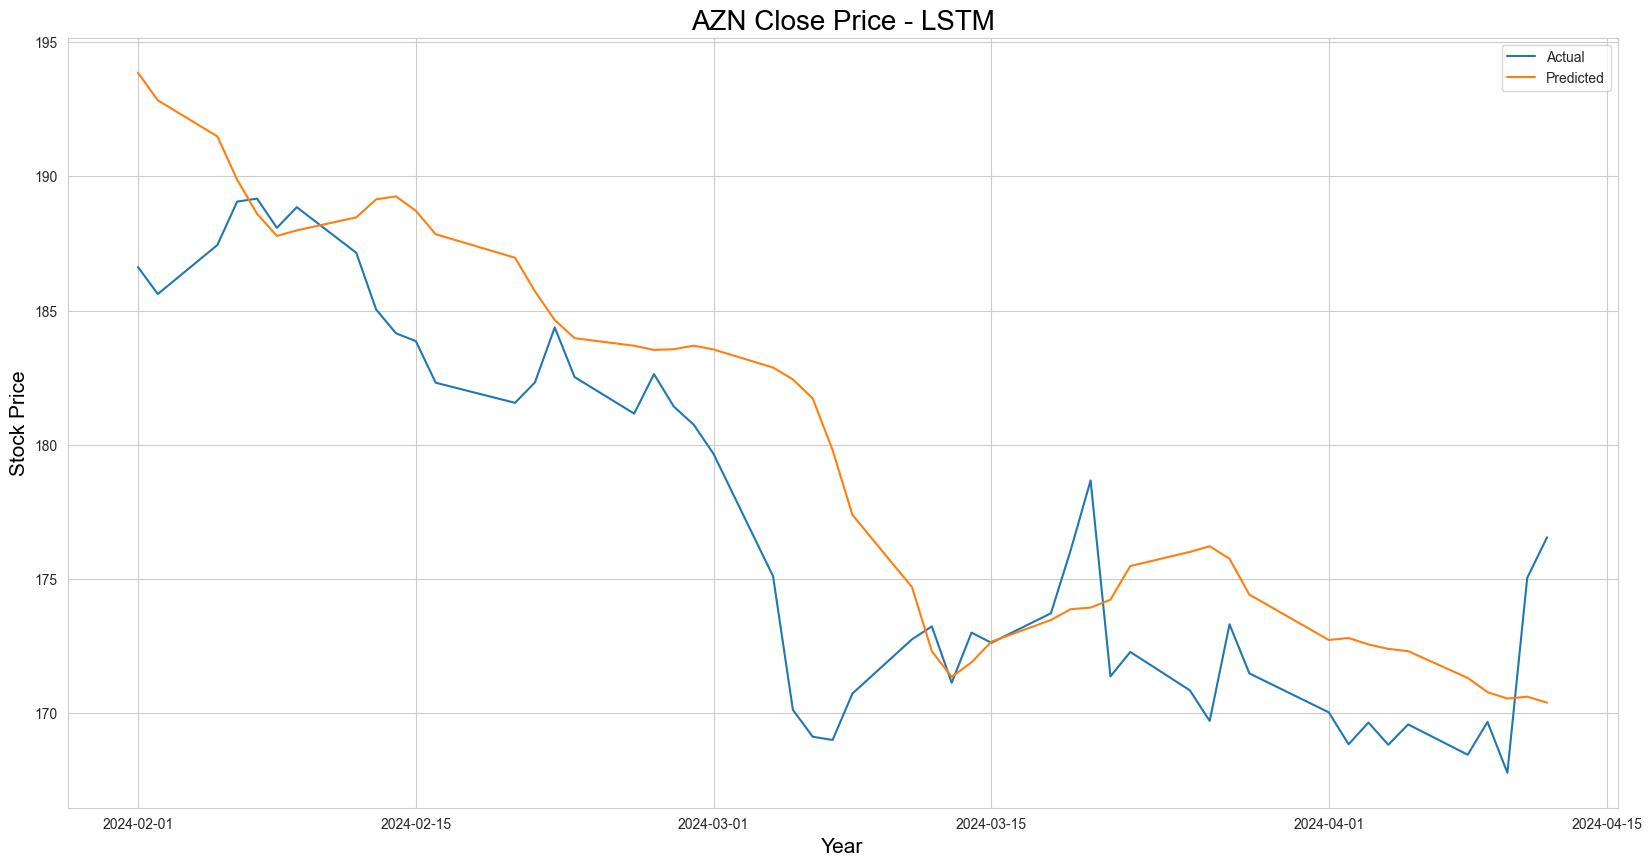

In [118]:
# train = azn_adj[:training_data_len]
# test = azn_adj[training_data_len:]
test['Predictions'] = pred

plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
#plt.plot(adj_df['Adj Close'], label='Training')
plt.plot(test['Adj Close'], label='Actual')
plt.plot(test['Predictions'], label='Predicted')
plt.title("AZN Close Price - LSTM", color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Stock Price', color = 'black', fontsize = 15)
plt.legend()

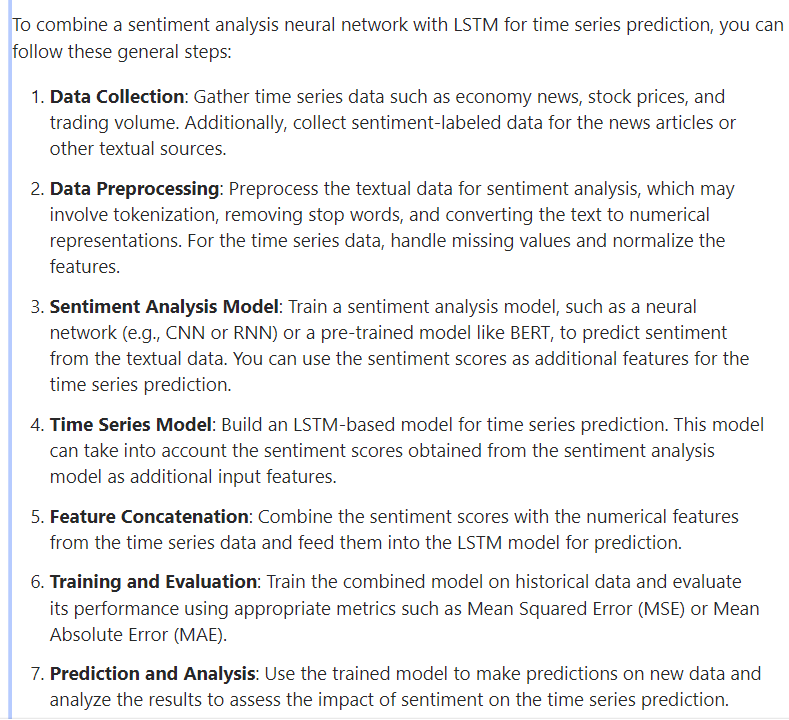